<a href="https://colab.research.google.com/github/willieny/SMTT/blob/main/SMTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as libs

In [ ]:
import nltk
import pandas as pd
import numpy as np
import math

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

Lendo o dataset

In [ ]:
df = pd.read_csv('viagens.csv')
df.head()

,Unnamed: 0,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem
0,0,1,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 05:30:00,2020-10-04 05:26:00,45,40.0,ida
1,1,2,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 06:15:00,2020-10-04 06:06:00,45,40.0,volta
2,2,3,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:00:00,2020-10-04 06:58:00,45,43.0,ida
3,3,4,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:45:00,2020-10-04 07:42:00,45,44.0,volta
4,4,5,1,87.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 08:30:00,2020-10-04 08:31:00,45,44.0,ida


In [ ]:
df.tail()

,Unnamed: 0,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem
21697,21697,21886,3,65.0,Cruz das Almas / Trapiche,107-EMBARQUE SOMENTE COM CARTÃO,Auto Viação Veleiro LTDA,3139,107,2020-10-06 21:11:00,2020-10-06 21:04:00,54,28.0,volta
21698,21698,21887,1,36.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 21:05:00,2020-10-06 21:03:00,45,36.0,ida
21699,21699,21888,1,36.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 21:51:00,2020-10-06 21:42:00,44,NaN,volta
21700,21700,21889,2,NaN,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3805,107,2020-10-06 21:55:00,NaN,45,NaN,ida
21701,21701,21890,2,NaN,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3805,107,2020-10-06 22:41:00,NaN,44,NaN,volta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21702 entries, 0 to 21701
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     21702 non-null  int64  
 1   numero_viagem_da_linha_no_dia  21702 non-null  int64  
 2   ordem_veiculo_na_linha_no_dia  21702 non-null  int64  
 3   duracao_total_realizada        19072 non-null  float64
 4   nome_linha                     21702 non-null  object 
 5   atendimento                    21702 non-null  object 
 6   empresa                        21702 non-null  object 
 7   numero_ordem_veiculo           21702 non-null  int64  
 8   numero_linha                   21702 non-null  int64  
 9   hora_prevista                  21702 non-null  object 
 10  hora_realizada                 19528 non-null  object 
 11  duracao_prevista               21702 non-null  int64  
 12  duracao_realizada              18169 non-null 

In [ ]:
df.describe()

,Unnamed: 0,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,numero_ordem_veiculo,numero_linha,duracao_prevista,duracao_realizada
count,21702.000000,21702.000000,21702.000000,19072.000000,21702.000000,21702.000000,21702.000000,18169.000000
mean,10850.500000,10928.901806,2.367938,91.302905,2826.321768,747.196986,49.936504,47.959602
std,6264.972107,6327.728890,1.819881,47.171439,1387.632289,1150.852796,22.779752,24.677096
min,0.000000,1.000000,1.000000,-37.000000,1001.000000,17.000000,1.000000,-37.000000
25%,5425.250000,5426.250000,1.000000,53.000000,1274.000000,107.000000,30.000000,30.000000
50%,10850.500000,10928.500000,2.000000,94.000000,2614.000000,604.000000,52.000000,48.000000
75%,16275.750000,16422.750000,3.000000,124.000000,4039.000000,804.000000,67.000000,64.000000
max,21701.000000,21890.000000,12.000000,265.000000,8620.000000,7151.000000,170.000000,192.000000


Tratando os dados

In [ ]:
# Remove a primeira coluna, que representa o índice
df = df.drop(['Unnamed: 0'], axis=1) 

In [ ]:
# Identificando os dados faltantes
df.isnull().sum()

numero_viagem_da_linha_no_dia       0
ordem_veiculo_na_linha_no_dia       0
duracao_total_realizada          2630
nome_linha                          0
atendimento                         0
empresa                             0
numero_ordem_veiculo                0
numero_linha                        0
hora_prevista                       0
hora_realizada                   2174
duracao_prevista                    0
duracao_realizada                3533
sentido_viagem                      0
dtype: int64

In [ ]:
df.shape

(21702, 13)

In [ ]:
# Obtendo a média para substituir nos dados faltantes
dtr_media = df['duracao_total_realizada'].mean()
dr_media = df['duracao_realizada'].mean()

# Arredondando a média
dtr_media = math.floor(dtr_media)
dr_media = math.floor(dr_media)

# Dando update nos dados faltantes em 'duracao_total_realizada' e 'duracao_realizada'
df.update(df['duracao_total_realizada'].fillna(dtr_media))
df.update(df['duracao_realizada'].fillna(dr_media))

In [ ]:
# As viagens não realizadas não possuem valor em 'hora_realizada'. Dessa forma, uma vez que não será analisado o cumprimento de viagem, então serão removidas as linhas cujo valor em 'hora_realizada' esteja faltando.
df = df.dropna(axis=0)

In [ ]:
# Após update em 'duracao_total_realizada' e 'duracao_realizada'
df.isnull().sum()

numero_viagem_da_linha_no_dia    0
ordem_veiculo_na_linha_no_dia    0
duracao_total_realizada          0
nome_linha                       0
atendimento                      0
empresa                          0
numero_ordem_veiculo             0
numero_linha                     0
hora_prevista                    0
hora_realizada                   0
duracao_prevista                 0
duracao_realizada                0
sentido_viagem                   0
dtype: int64

In [ ]:
df.shape

(19528, 13)

In [ ]:
# Renomear o índice do dataset porque ao remover os dados faltantes em 'hora_realizada' o índice ficou com alguns buracos.
index = []
for j in range(len(df)):
  index.append(j)

df = df.set_index([pd.Index(index)])
df

,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem
0,1,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 05:30:00,2020-10-04 05:26:00,45,40.0,ida
1,2,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 06:15:00,2020-10-04 06:06:00,45,40.0,volta
2,3,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:00:00,2020-10-04 06:58:00,45,43.0,ida
3,4,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:45:00,2020-10-04 07:42:00,45,44.0,volta
4,5,1,87.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 08:30:00,2020-10-04 08:31:00,45,44.0,ida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,21882,1,84.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 19:36:00,2020-10-06 19:44:00,88,34.0,volta
19524,21885,3,65.0,Cruz das Almas / Trapiche,107-EMBARQUE SOMENTE COM CARTÃO,Auto Viação Veleiro LTDA,3139,107,2020-10-06 20:15:00,2020-10-06 20:23:00,55,37.0,ida
19525,21886,3,65.0,Cruz das Almas / Trapiche,107-EMBARQUE SOMENTE COM CARTÃO,Auto Viação Veleiro LTDA,3139,107,2020-10-06 21:11:00,2020-10-06 21:04:00,54,28.0,volta
19526,21887,1,36.0,Cruz das Almas / Trapiche,TRAPICHE/CRUZ DAS ALMAS,Auto Viação Veleiro LTDA,3150,107,2020-10-06 21:05:00,2020-10-06 21:03:00,45,36.0,ida


Transformando variáveis categóricas em variáveis numéricas 

In [ ]:
# Criando variáveis 'adiantamento' e 'atraso' a partir de 'hora_prevista' e 'hora_realizada'
adiantamento = pd.DataFrame(np.where(df['hora_prevista']>df['hora_realizada'], 1, 0), columns=['adiantamento'])
atraso = pd.DataFrame(np.where(df['hora_prevista']<df['hora_realizada'], 1, 0), columns=['atraso'])

adiantamento.head()
atraso.head()

,atraso
0,0
1,0
2,0
3,0
4,1


In [ ]:
# Trocando o nome da empresa por um inteiro
from sklearn import preprocessing

label = preprocessing.LabelEncoder()

empresa = {'empresa': label.fit_transform(df['empresa'])}
empresa_df = pd.DataFrame(data=empresa)

empresa_dict = dict(zip([0,1,2,3], label.classes_)) # dicionário 
empresa_df

,empresa
0,2
1,2
2,2
3,2
4,2
...,...
19523,0
19524,0
19525,0
19526,0


In [115]:
# Trocando o sentido da viagem (ida e volta) por um inteiro
from sklearn import preprocessing

label = preprocessing.LabelEncoder()

sentido = {'sentido': label.fit_transform(df['sentido_viagem'])}
sentido_df = pd.DataFrame(data=sentido) # 0 = ida, 1 = volta

sentido_dict = dict(zip([0,1], label.classes_)) # dicionário 
sentido_df 

#sentido = pd.get_dummies(df['sentido_viagem'])
#sentido

9525

In [ ]:
# Criando uma variável para cada valor único de 'sentido_viagem'
numero_linha = df['numero_linha']

numero_linha.head()

0    46
1    46
2    46
3    46
4    46
Name: numero_linha, dtype: int64

In [52]:
# Features/Variáveis selecionadas para o dataset
# adiantamento, atraso, empresa e sentido_viagem
data = pd.concat([adiantamento, atraso, empresa_df, numero_linha, sentido_df], axis=1)
data

,adiantamento,atraso,empresa,numero_linha,sentido
0,1,0,2,46,0
1,1,0,2,46,1
2,1,0,2,46,0
3,1,0,2,46,1
4,0,1,2,46,0
...,...,...,...,...,...
19523,0,1,0,107,1
19524,0,1,0,107,0
19525,1,0,0,107,1
19526,1,0,0,107,0


In [ ]:
print('Data com valores nulos: \n', data.isnull().sum())

Data com valores nulos: 
 adiantamento                      0
atraso                            0
empresa                           0
Auto Viação Veleiro LTDA          0
Empresa São Francisco             0
Real Transportes Urbanos Ltda.    0
Viação Cidade de Maceió           0
numero_linha                      0
sentido                           0
dtype: int64


In [113]:
# Contagem das variáveis em relação ao atraso e adiantamento

e_at = data[['empresa', 'atraso']].groupby(['empresa'], as_index=False).sum().sort_values(by='empresa')
e_ad = data[['empresa', 'adiantamento']].groupby(['empresa'], as_index=False).sum().sort_values(by='empresa')
sen_at = data[['sentido', 'atraso']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')
sen_ad = data[['sentido', 'adiantamento']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')
nl_at = data[['numero_linha', 'atraso']].groupby(['numero_linha'], as_index=False).sum().sort_values(by='numero_linha')
nl_ad = data[['numero_linha', 'adiantamento']].groupby(['numero_linha'], as_index=False).sum().sort_values(by='numero_linha')
soma_at = data['atraso'].sum()
soma_ad = data['adiantamento'].sum()
print(soma_at, soma_ad)

9987 7904


Explorando os dados com estatísticas descritivas e gráficas para descrever e resumir as features.

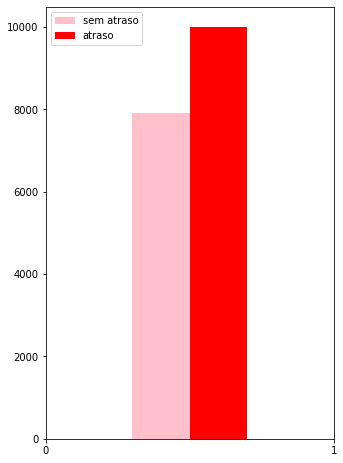

In [144]:
#VISUALIZAÇÃO GERAL DE ATRASO
X = np.arange(1)
fig = plt.figure(figsize = (4, 6))
indx = np.arange(2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.4, soma_ad, color = 'pink', width = 0.2, label = 'sem atraso')
ax.bar(X + 0.6, soma_at, color = 'r', width = 0.2, label = 'atraso')
ax.set_xticks(indx)
ax.legend()

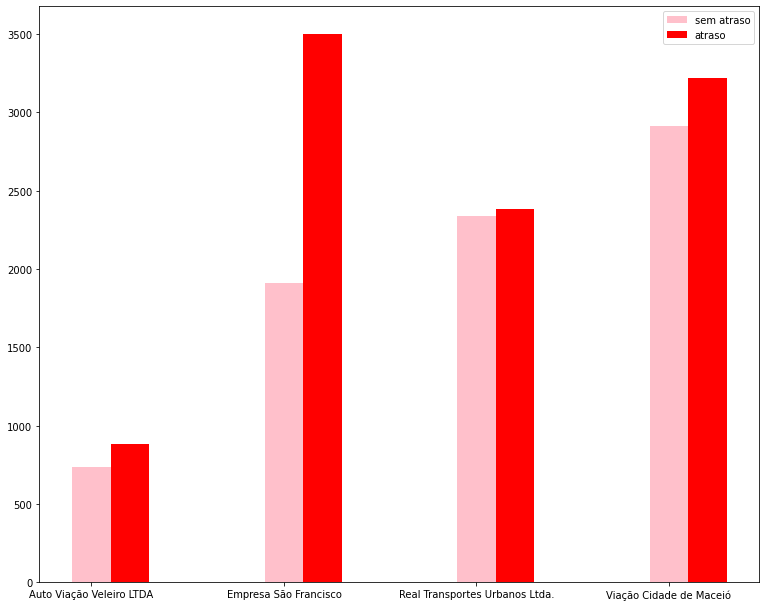

In [145]:
#VISUALIZAÇÃO ATRASO POR EMPRESA
X = np.arange(4)
fig = plt.figure(figsize = (10, 8))
labels = ['Auto Viação Veleiro LTDA','Empresa São Francisco','Real Transportes Urbanos Ltda.','Viação Cidade de Maceió']
indx = np.arange(len(labels))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, e_ad['adiantamento'], color = 'pink', width = 0.2, label = 'sem atraso')
ax.bar(X + 0.2, e_at['atraso'], color = 'r', width = 0.2, label = 'atraso')
ax.set_xticks(indx)
ax.set_xticklabels(labels)
ax.legend()

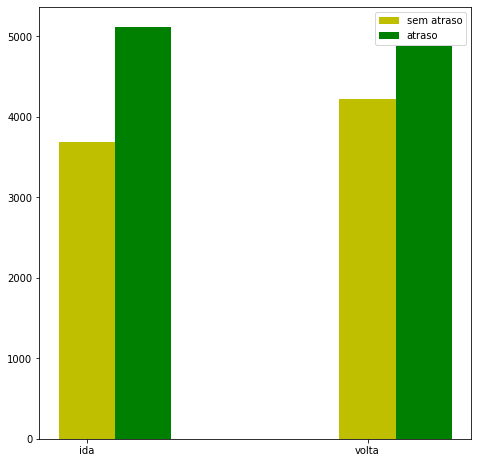

In [141]:
#VISUALIZAÇÃO GERAL IDA E VOLTA
X = np.arange(2)
fig = plt.figure(figsize = (6, 6))
labels = ['ida', 'volta']
indx = np.arange(len(labels))

ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, sen_ad['adiantamento'], color = 'y', width = 0.2, label = 'sem atraso')
ax.bar(X + 0.2, sen_at['atraso'], color = 'g', width = 0.2, label = 'atraso')
ax.set_xticks(indx)
ax.set_xticklabels(labels)
ax.legend()

In [95]:
empresa0 = data.loc[data['empresa'] == 0]
empresa1 = data.loc[data['empresa'] == 1]
empresa2 = data.loc[data['empresa'] == 2]
empresa3 = data.loc[data['empresa'] == 3]

# Empresa 0 
e0_at = empresa0[['sentido', 'atraso']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')
e0_ad = empresa0[['sentido', 'adiantamento']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')

# Empresa 1
e1_at = empresa1[['sentido', 'atraso']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')
e1_ad = empresa1[['sentido', 'adiantamento']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')

# Empresa 2
e2_at = empresa2[['sentido', 'atraso']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')
e2_ad = empresa2[['sentido', 'adiantamento']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')

# Empresa 3
e3_at = empresa3[['sentido', 'atraso']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')
e3_ad = empresa3[['sentido', 'adiantamento']].groupby(['sentido'], as_index=False).sum().sort_values(by='sentido')


[Text(0, 0.5, 'nº de viagens'),
 Text(0.5, 0, 'sentido'),
 Text(0.5, 1.0, 'Viação Cidade de Maceió')]

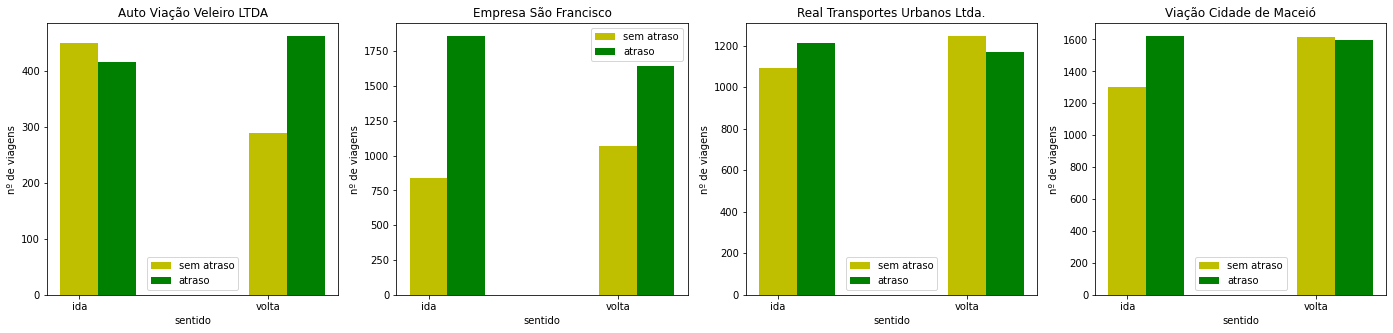

In [105]:
#VISUALIZAÇÃO DO ATRASO EM CADA EMPRESA POR SENTIDO
X = np.arange(2)
labels = ['ida', 'volta']
indx = np.arange(len(labels))

fig, (ax, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(24,5))

ax.bar(X + 0.0, e0_ad['adiantamento'], color='y', width = 0.2, label = 'sem atraso')
ax.bar(X + 0.2, e0_at['atraso'], color = 'g', width = 0.2, label = 'atraso')
ax.set_xticks(indx)
ax.set_xticklabels(labels)
ax.legend()

ax1.bar(X + 0.0, e1_ad['adiantamento'], color = 'y', width = 0.2, label = 'sem atraso')
ax1.bar(X + 0.2, e1_at['atraso'], color = 'g', width = 0.2, label = 'atraso')
ax1.set_xticks(indx)
ax1.set_xticklabels(labels)
ax1.legend()

ax2.bar(X + 0.0, e2_ad['adiantamento'], color = 'y', width = 0.2, label = 'sem atraso')
ax2.bar(X + 0.2, e2_at['atraso'], color = 'g', width = 0.2, label = 'atraso')
ax2.set_xticks(indx)
ax2.set_xticklabels(labels)
ax2.legend()

ax3.bar(X + 0.0, e3_ad['adiantamento'], color = 'y', width = 0.2, label = 'sem atraso')
ax3.bar(X + 0.2, e3_at['atraso'], color = 'g', width = 0.2, label = 'atraso')
ax3.set_xticks(indx)
ax3.set_xticklabels(labels)
ax3.legend()

ax.set(title="Auto Viação Veleiro LTDA", xlabel="sentido", ylabel="nº de viagens")
ax1.set(title="Empresa São Francisco", xlabel="sentido", ylabel="nº de viagens")
ax2.set(title="Real Transportes Urbanos Ltda.", xlabel="sentido", ylabel="nº de viagens")
ax3.set(title="Viação Cidade de Maceió", xlabel="sentido", ylabel="nº de viagens")

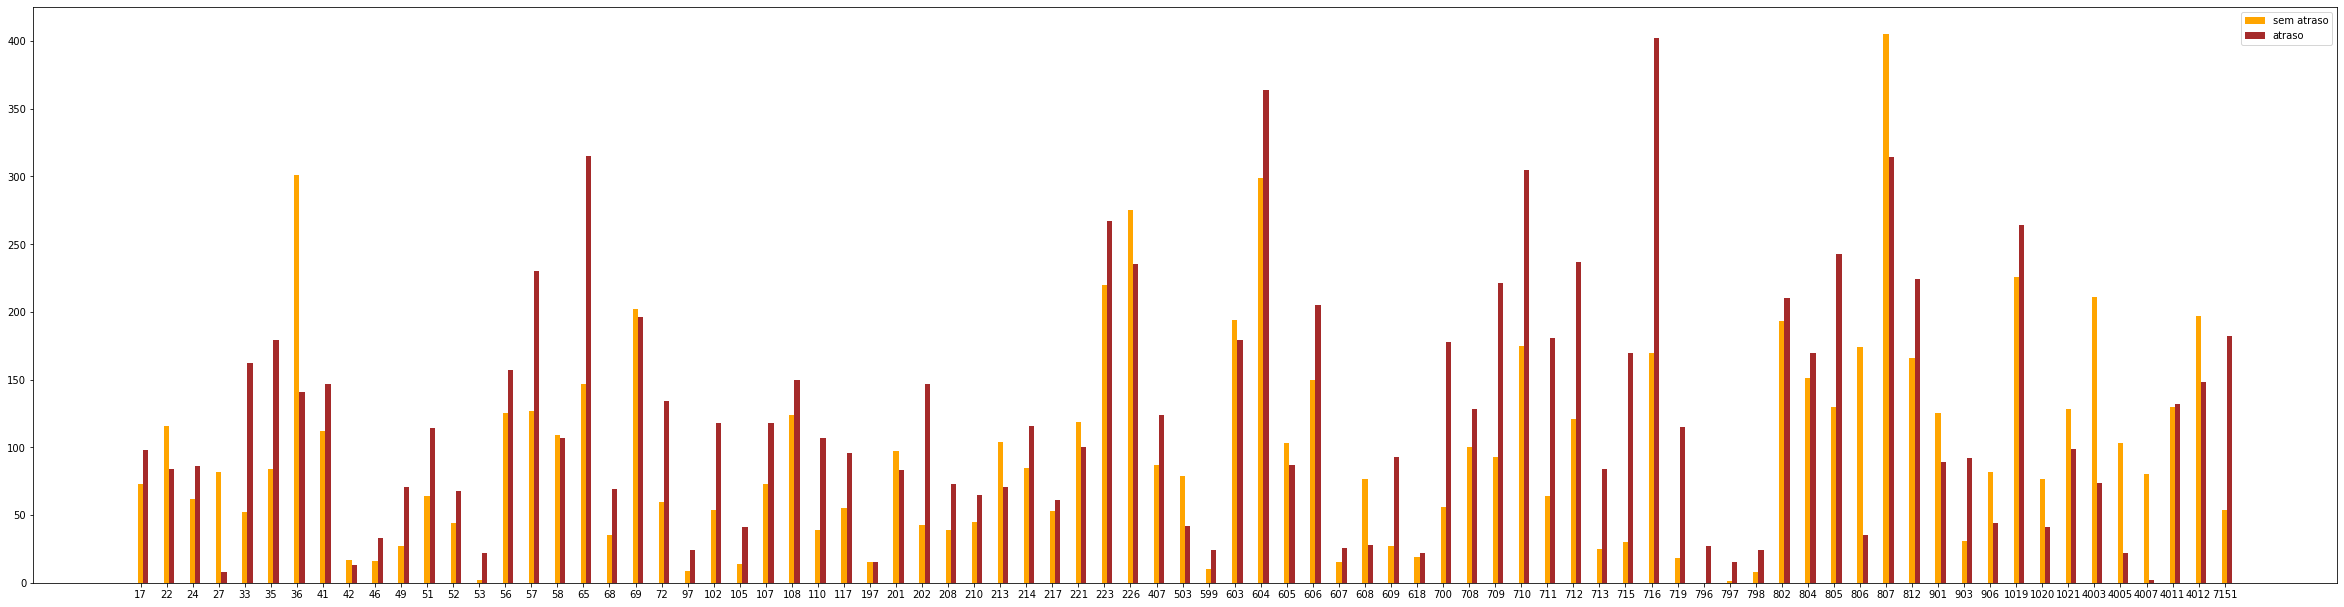

In [146]:
#VISUALIZAÇÃO GERAL ATRASO POR LINHA
X = np.arange(len(nl_ad))
fig = plt.figure(figsize = (32, 8))
labels = nl_at['numero_linha']
indx = np.arange(len(labels))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, nl_ad['adiantamento'], color = 'orange', width = 0.2, label = 'sem atraso')
ax.bar(X + 0.2, nl_at['atraso'], color = 'brown', width = 0.2, label = 'atraso')
ax.set_xticks(indx)
ax.set_xticklabels(labels)
ax.legend()

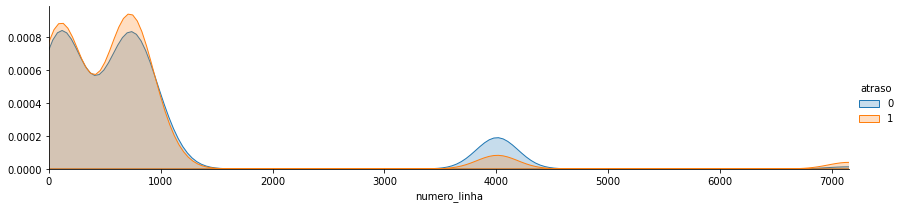

In [ ]:
a = sns.FacetGrid( data, hue = 'atraso', aspect=4)
a.map(sns.kdeplot, 'numero_linha', shade= True )
a.set(xlim=(0 , data['numero_linha'].max()))
a.add_legend()

Visualizando os dados

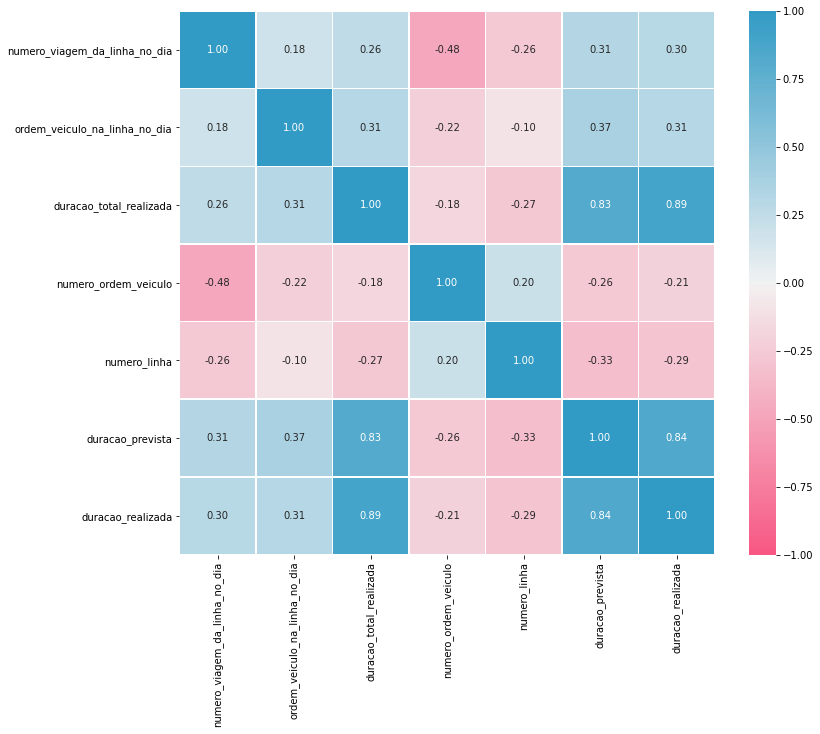

In [ ]:
# Um heat map de correlação pode nos dar uma compreensão de quais variáveis são importantes

f,ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cmap=cmap, vmin=-1, vmax=1)
plt.show()